# Max Scherzer Game 7 World Series

### Libraries

In [70]:
#apache http library
import requests 

#XML parsing
import xml.etree.ElementTree as ET 

import os
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle
from numpy.random import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

from termcolor import colored

### Get player data

In [71]:
url = 'http://gd2.mlb.com/components/game/mlb/year_2019/month_10/day_30/gid_2019_10_30_wasmlb_houmlb_1/players.xml'
resp = requests.get(url)
print(colored(resp, 'blue'))

<Response [200]>


In [72]:
xmlfile = 'WSH_HOU_Players.xml'
with open(xmlfile, 'wb') as f:
    f.write(resp.content)
statinfo = os.stat(xmlfile)


In [73]:
# pull in players <game><team><player>
tree = ET.parse(xmlfile)
game = tree.getroot()
teams = game.findall('./team')
teams

[<Element 'team' at 0x11de53770>, <Element 'team' at 0x11db01410>]

In [74]:
PlayerDict = {}

for team in teams:
    print(team.attrib.get('name'))
    players = team.findall('player')
    for player in players:
        print('', player.attrib.get('id'), player.attrib.get('first'), player.attrib.get('last'))
        PlayerDict[player.attrib.get('id')] = player.attrib.get('first') + ' ' + player.attrib.get('last')

Washington Nationals
 645302 Victor Robles
 475582 Ryan Zimmerman
 543339 Daniel Hudson
 594809 Adam Eaton
 593833 Wander Suero
 663432 Tanner Rainey
 605452 Joe Ross
 571431 Matt Adams
 543685 Anthony Rendon
 452678 Asdrubal Cabrera
 543228 Yan Gomes
 448281 Sean Doolittle
 544931 Stephen Strasburg
 435559 Kurt Suzuki
 453286 Max Scherzer
 571578 Patrick Corbin
 407845 Fernando Rodney
 665742 Juan Soto
 572821 Brian Dozier
 467827 Gerardo Parra
 435062 Howie Kendrick
 434671 Anibal Sanchez
 572191 Michael A. Taylor
 607208 Trea Turner
 457915 Javy Guerra
Houston Astros
 455139 Robinson Chirinos
 455117 Martin Maldonado
 663656 Kyle Tucker
 425844 Zack Greinke
 608324 Alex Bregman
 493329 Yuli Gurriel
 444468 Hector Rondon
 501789 Will Harris
 606965 Chris Devenski
 502210 Josh Reddick
 514888 Jose Altuve
 532077 Roberto Osuna
 543807 George Springer
 501925 Joe Smith
 488726 Michael Brantley
 664353 Jose Urquidy
 649557 Aledmys Diaz
 621043 Carlos Correa
 519151 Ryan Pressly
 502748 B

### Get innings data

In [75]:
# get innings - all data

url = 'http://gd2.mlb.com/components/game/mlb/year_2019/month_10/day_30/gid_2019_10_30_wasmlb_houmlb_1/inning/inning_all.xml'
resp = requests.get(url)
print(colored(resp, 'blue'))

<Response [200]>


In [76]:
xmlfile = 'HOU_NYY_game.xml'
with open(xmlfile, 'wb') as f:
    f.write(resp.content)
statinfo = os.stat(xmlfile)

In [77]:
tree = ET.parse(xmlfile)
root = tree.getroot()

# unpack the game to get all the innings
for child in root:
    print(child.tag, child.attrib.get('num'))
    for frame in child:
        print('   ', frame.tag, frame.attrib)

inning 1
    top {}
    bottom {}
inning 2
    top {}
    bottom {}
inning 3
    top {}
    bottom {}
inning 4
    top {}
    bottom {}
inning 5
    top {}
    bottom {}
inning 6
    top {}
    bottom {}
inning 7
    top {}
    bottom {}
inning 8
    top {}
    bottom {}
inning 9
    top {}
    bottom {}


In [78]:
frames = ['top', 'bottom']

pitchDictionary = { "FA":"fastball", "FF":"4-seam fb", "FT": "2-seam fb", "FC": "fb-cutter", "":"unknown", None: "none",
                    "FS":"fb-splitter", "SL":"slider", "CH":"changeup","CU":"curveball","KC":"knuckle-curve",
                    "KN":"knuckleball","EP":"eephus", "UN":"unidentified", "PO":"pitchout", "SI":"sinker", "SF":"split-finger"
                    }

PitchDF = pd.DataFrame(columns = ['pitchIdx', 'inning', 'frame', 'ab', 'abIdx', 'batter', 'stand', 'speed', 
                                  'pitchtype', 'px', 'pz', 'szTop', 'szBottom', 'des'])

colors = {'R':'red', 'L':'black'}
markers = {'R': 'x', 'L': 'o'}

### Get pitch by pitch data

In [79]:
totalPitchCount = 0 
topPitchCount = 0 
bottomPitchCount = 0

innings = root.findall('./inning')
for inning in innings:
    for i in range(len(frames)):
        color = 'green' if i==0 else 'yellow' # show top in green and yellow for bottom
        print(colored('\nInning:' + inning.attrib.get('num') + '(', color, attrs=['reverse']))
        fr = inning.find(frames[i])
        if fr is not None:
            for ab in fr.iter('atbat'):
                battername = PlayerDict[ab.get('batter')]
                abPitchCount = 0 
                print(colored('   ' + battername, color, attrs=['bold']))
                
                pitches = ab.findall('pitch')
                #print(pitches)
                for pitch in pitches:
                    abPitchCount = abPitchCount + 1
                    totalPitchCount = totalPitchCount + 1
                    verbosePitch = pitchDictionary[pitch.get('pitch_type')]
                    print(colored('   ' + str(abPitchCount) + ': ' + verbosePitch))
                print('   ' + colored(ab.attrib.get('event'), color, attrs=['underline']))
print('Total Pitches:' + ' ' + str(totalPitchCount))


Inning:1(
   Trea Turner
   1: 4-seam fb
   2: slider
   Lineout
   Adam Eaton
   1: 4-seam fb
   2: curveball
   3: 4-seam fb
   4: curveball
   5: changeup
   Groundout
   Anthony Rendon
   1: slider
   Groundout

Inning:1(
   George Springer
   1: 4-seam fb
   2: 4-seam fb
   3: slider
   4: 4-seam fb
   5: slider
   6: 4-seam fb
   Flyout
   Jose Altuve
   1: fb-cutter
   2: 4-seam fb
   Groundout
   Michael Brantley
   1: curveball
   2: changeup
   3: 4-seam fb
   4: 4-seam fb
   5: 4-seam fb
   Walk
   Alex Bregman
   1: slider
   2: 4-seam fb
   Flyout

Inning:2(
   Juan Soto
   1: 4-seam fb
   2: changeup
   3: curveball
   4: 4-seam fb
   5: 4-seam fb
   Single
   Howie Kendrick
   1: 4-seam fb
   2: changeup
   Grounded Into DP
   Asdrubal Cabrera
   1: 4-seam fb
   2: 4-seam fb
   3: curveball
   4: changeup
   5: slider
   Groundout

Inning:2(
   Yuli Gurriel
   1: slider
   2: 4-seam fb
   3: 4-seam fb
   4: slider
   Home Run
   Yordan Alvarez
   1: 4-seam fb
   2: 4-se

### Pitch locations

In [80]:
for inning in innings:
    for i in range(len(frames)):
        fr = inning.find(frames[i])
        if fr is not None:
            for ab in fr.iter('atbat'):
                battername = PlayerDict[ab.get('batter')]
                standside = ab.get('stand')
                abIdx = ab.get('num')
                abPitchCount = 0 
                pitches = ab.findall('pitch')
                
                #print(pitches)
                for pitch in pitches:
                    if pitch.attrib.get('start_speed') is None:
                        speed = 0 
                    else:
                        speed = float(pitch.attrib.get('start_speed'))
                    pxfloat = 0.0 if pitch.attrib.get('px') == None else float('{0:.2f}'.format(float(pitch.attrib.get('px'))))
                    pzfloat = 0.0 if pitch.attrib.get('pz') == None else float('{0:.2f}'.format(float(pitch.attrib.get('pz'))))
                    szTop = 0.0 if pitch.attrib.get('sz_top') == None else float('{0:.2f}'.format(float(pitch.attrib.get('sz_top'))))
                    szBot = 0.0 if pitch.attrib.get('sz_bot') == None else float('{0:.2f}'.format(float(pitch.attrib.get('sz_bot'))))
                    print(pxfloat, pzfloat, szTop, szBot)
                    
                    abPitchCount = abPitchCount + 1
                    totalPitchCount = totalPitchCount + 1
                    
                    if frames[i] =='top':
                        topPitchCount = topPitchCount + 1
                    else:
                        bottomPitchCount = bottomPitchCount + 1
                    inn = inning.attrib.get('num')
                    des = pitch.get('des')    
                    verbosePitch = pitchDictionary[pitch.get('pitch_type')]
                    
                    PitchDF.loc[totalPitchCount] = [totalPitchCount, inn, frames[i], abIdx, abPitchCount, battername, 
                                                   standside, speed, verbosePitch, pxfloat, pzfloat, szTop, szBot, des]

print(str(totalPitchCount) + " pitches cataloged. Top: " + str(topPitchCount) + ". Bottom: " + str(bottomPitchCount) + ".")

0.35 1.95 3.18 1.43
-0.15 1.54 2.98 1.39
-0.16 2.94 3.03 1.37
-0.31 1.57 2.98 1.39
-1.35 4.63 2.92 1.36
-1.14 2.44 2.92 1.28
-0.97 1.93 3.14 1.48
0.3 1.48 3.14 1.48
1.12 1.67 3.64 1.66
0.2 1.29 3.56 1.58
-0.35 1.95 3.54 1.59
-0.76 2.05 3.51 1.56
-1.55 1.97 3.5 1.56
-0.08 2.17 2.95 1.33
-0.59 2.17 2.95 1.33
-0.5 2.22 3.35 1.56
-2.77 2.61 3.51 1.51
-2.04 2.3 3.54 1.57
-1.2 2.74 3.51 1.54
-0.54 2.31 3.5 1.63
-1.18 2.35 3.58 1.57
-0.34 2.97 3.22 1.61
-0.16 3.06 3.17 1.51
-0.95 2.06 3.34 1.5
0.6 0.77 3.34 1.51
-1.24 2.76 3.33 1.51
0.32 1.55 3.35 1.51
-0.08 2.37 3.1 1.38
0.12 1.2 3.13 1.37
-0.79 2.89 3.4 1.65
-0.34 1.34 3.45 1.67
-0.39 1.07 3.38 1.6
0.2 2.07 3.4 1.65
-0.87 2.91 3.4 1.61
-0.23 1.33 3.34 1.59
-0.8 2.13 3.52 1.6
0.97 1.4 3.42 1.67
0.13 1.78 3.46 1.69
-0.22 1.75 3.34 1.59
-0.34 3.14 3.49 1.71
0.26 2.78 3.47 1.64
0.33 3.11 3.47 1.64
-1.25 2.62 3.65 1.72
0.48 1.72 3.68 1.75
-0.41 1.75 3.47 1.64
0.44 2.43 3.47 1.64
-0.76 3.72 3.16 1.48
0.5 1.16 3.57 1.67
1.16 2.3 3.43 1.56
0.09 1.0

### Save data

In [81]:
PitchDF.to_csv('PitchDF_NatsGame7.csv')

### Scherzer's performance

In [82]:
# Slice out just Max pitches

PitchDF['inning'] = PitchDF['inning'].astype(int)
Max = PitchDF.loc[(PitchDF['frame']=='bottom') & (PitchDF['inning']<6)]

In [83]:
# Organize pitch data

uniqueDesList = Max['des'].unique()
#print(uniqueDesList)

ballColList = []
strikeColList = []
ballCount = 0 
strikeCount = 0

for index, row in Max.iterrows():
    des = row['des']
    #print(des)
    if row['abIdx'] == 1:
        ballCount = 0 
        strikeCount = 0 

    # save the count
    ballColList.append(ballCount)
    strikeColList.append(strikeCount)
    
    if 'Ball' in des:
        ballCount = ballCount +1
    elif 'Foul' in des:
        if strikeCount is not 2:
            strikeCount = strikeCount +1
    elif 'Strike' in des:
        strikeCount = strikeCount +1
    
Max['ballCount'] = ballColList
Max['strikeCount'] = strikeColList

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [84]:
# What pitches did he throw?

Max['pitchtype'].unique()

array(['4-seam fb', 'slider', 'fb-cutter', 'curveball', 'changeup'],
      dtype=object)

### Speed

In [85]:
print('Average speed of 4-seam fastball: ' + str(np.mean(Max.loc[Max['pitchtype']=='4-seam fb']['speed'])))
print('Average speed of changeup: ' + str(np.mean(Max.loc[Max['pitchtype']=='changeup']['speed'])))
print('Average speed of curveball: ' + str(np.mean(Max.loc[Max['pitchtype']=='curveball']['speed'])))
print('Average speed of slider: ' + str(np.mean(Max.loc[Max['pitchtype']=='slider']['speed'])))

Average speed of 4-seam fastball: 95.58727272727273
Average speed of changeup: 85.3375
Average speed of curveball: 80.10000000000001
Average speed of slider: 85.75454545454544


### Velocity change per pitch

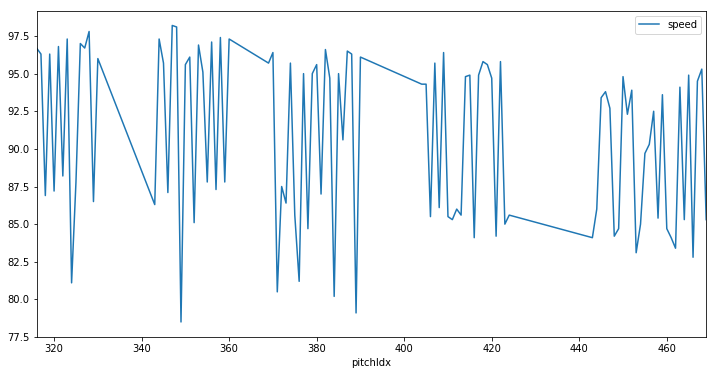

In [86]:
lines = Max.plot.line(x = 'pitchIdx', y = 'speed', figsize = [12,6])

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


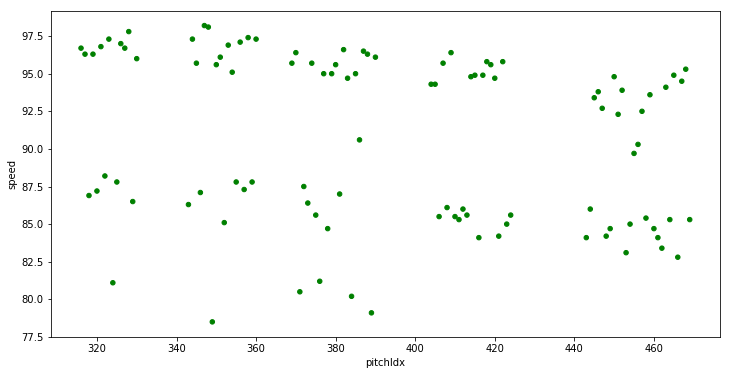

In [87]:
color= ['yellow' if f=='top' else 'green' for f in Max['frame'].tolist()]
Max.index.rename('idx', inplace=True)
Max['pitchIdx'] = Max['pitchIdx'].astype(float)
Max.dtypes
Max.plot(kind='scatter',x='pitchIdx', y='speed', color=color,  figsize=[12,6])

### Pitch type by pitch count

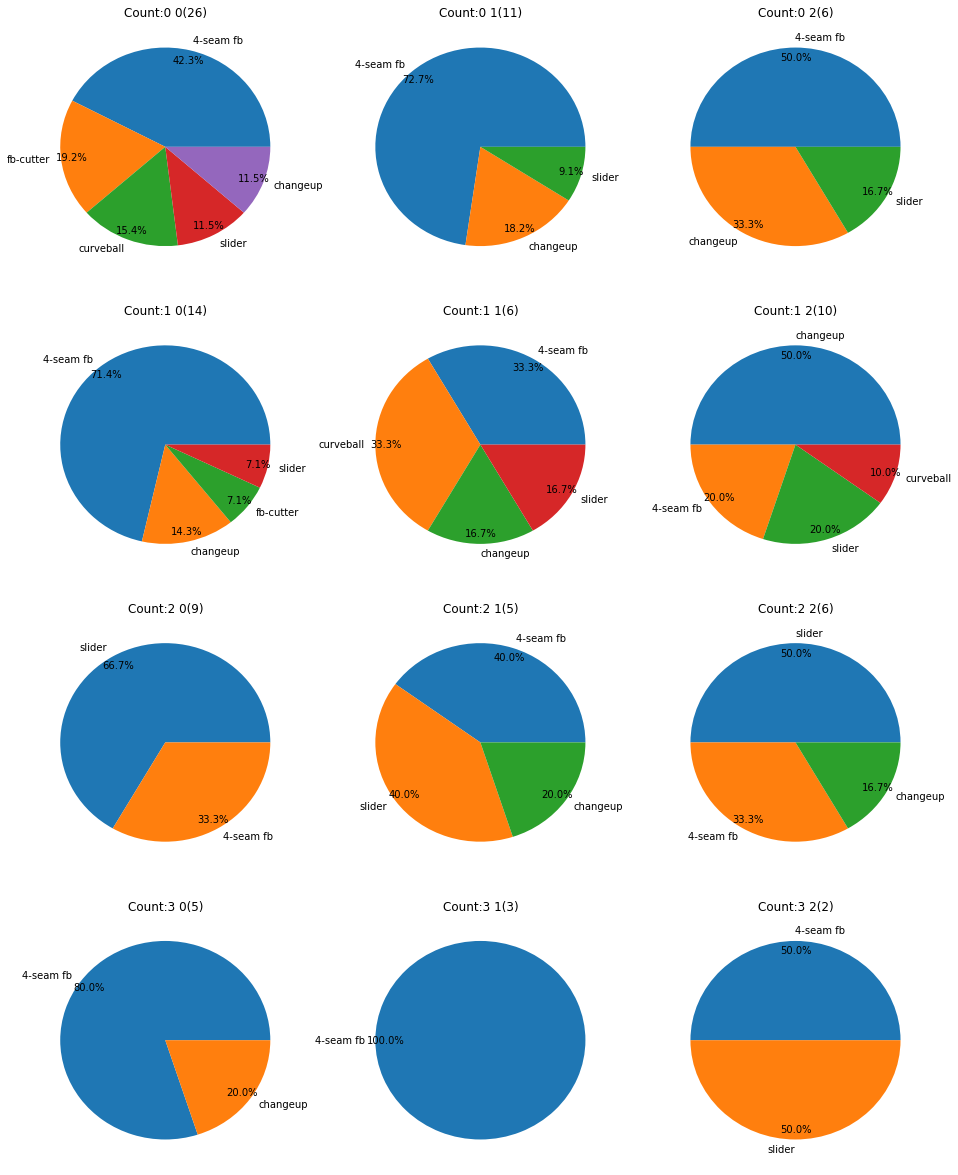

In [88]:
titleList = []
dataList = []
fig, axes = plt.subplots(4,3, figsize=[16,21])

for b in range(4):
    for s in range(3):
        #print('Count:', str(b), str(s))
        df2 = Max.loc[(Max['ballCount']==b) & (Max['strikeCount']==s)]
        title = 'Count:' + str(b) + ' ' + str(s) + '(' + str(len(df2)) + ')'
        titleList.append(title)
        dataList.append(df2)
for i, ax in enumerate(axes.flatten()):
    x = dataList[i].pitchtype.value_counts()
    l = dataList[i].pitchtype.unique()
    #print(x)
    ax.pie(x, radius = 1, autopct="%.1f%%", pctdistance=0.9, labels=l)
    ax.set_title(titleList[i])

plt.show()